# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Download stopwords for text processing
nltk.download('stopwords')

# Download WordNet for lemmatization
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def reading_data(file_path):

    # Initialize empty lists to store text data and sentiments
    text_data, sentiments = [], []

    # Read the content of the file
    file_data = open(file_path).read()

    # Process each line in the file
    for i, line in enumerate(file_data.split("\n")):
        # Split each line into words
        after_split = line.split(' ')

        # Extract text data (excluding the first element) and sentiment (first element)
        text_data.append(" ".join(after_split[1:]))
        sentiments.append(after_split[0])

    # Return the extracted text data and sentiments
    return text_data, sentiments

In [ ]:
import pandas as pd

def reading_data(file_path):
    # Assuming reading_data function reads text data from a file and extracts text and sentiment labels
    with open(file_path, 'r') as file:
        data = file.readlines()
    text_data = [line.strip() for line in data]
    sentiments = [int(line[0]) for line in data]
    return text_data, sentiments

# Reading training data
training_text_data, training_sentiments = reading_data('/content/stsa-train.txt')

# Creating a DataFrame for training data with sentiment labels and raw text
training_df = pd.DataFrame({'Sentimental Value': training_sentiments, 'Raw Data': training_text_data})
print("Training Data:")
print(training_df)

# Reading testing data
testing_text_data, testing_sentiments = reading_data('/content/stsa-test.txt')

# Creating a DataFrame for testing data with sentiment labels and raw text
testing_df = pd.DataFrame({'Sentimental Value': testing_sentiments, 'Raw Data': testing_text_data})
print("\nTesting Data:")
print(testing_df)


Training Data:
      Sentimental Value                                           Raw Data
0                     1  1 a stirring , funny and finally transporting ...
1                     0  0 apparently reassembled from the cutting-room...
2                     0  0 they presume their audience wo n't sit still...
3                     1  1 this is a visually stunning rumination on lo...
4                     1  1 jonathan parker 's bartleby should have been...
...                 ...                                                ...
6915                  1  1 painful , horrifying and oppressively tragic...
6916                  0  0 take care is nicely performed by a quintet o...
6917                  0  0 the script covers huge , heavy topics in a b...
6918                  0  0 a seriously bad film with seriously warped l...
6919                  1  1 a deliciously nonsensical comedy about a cit...

[6920 rows x 2 columns]

Testing Data:
      Sentimental Value                      

In [ ]:
import re
from nltk.corpus import stopwords

# Function for noise removal
def remove_noise(text):
    # Removal of special characters
    text = ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', char) for char in text)
    # Removal of punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function for stopwords removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join(word for word in text.split() if word.lower() not in stop_words)

# Apply pre-processing steps to training data
training_df['After noise removal'] = training_df['Raw Data'].apply(remove_noise)
training_df['Stopwords removal'] = training_df['After noise removal'].apply(remove_stopwords)
training_df['Lower casing'] = training_df['Stopwords removal'].str.lower()

# Apply pre-processing steps to testing data
testing_df['After noise removal'] = testing_df['Raw Data'].apply(remove_noise)
testing_df['Stopwords removal'] = testing_df['After noise removal'].apply(remove_stopwords)
testing_df['Lower casing'] = testing_df['Stopwords removal'].str.lower()

print("Testing Data:")
print(testing_df)
print("\nTraining Data:")
print(training_df)


Testing Data:
      Sentimental Value                                           Raw Data  \
0                     0   0 no movement , no yuks , not much of anything .   
1                     0  0 a gob of drivel so sickly sweet , even the e...   
2                     0  0 gangs of new york is an unapologetic mess , ...   
3                     0  0 we never really feel involved with the story...   
4                     1          1 this is one of polanski 's best films .   
...                 ...                                                ...   
1816                  0  0 an often-deadly boring , strange reading of ...   
1817                  0  0 the problem with concept films is that if th...   
1818                  0  0 safe conduct , however ambitious and well-in...   
1819                  0  0 a film made with as little wit , interest , ...   
1820                  0  0 but here 's the real damn : it is n't funny ...   

                                    After noise r

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with 'word' analyzer
tfidf_vectorizer = TfidfVectorizer(analyzer='word')

# Fit and transform the training data
x_train = tfidf_vectorizer.fit_transform(training_df['Lower casing'])

# Use the vocabulary learned from training data to transform the testing data
x_test = tfidf_vectorizer.transform(testing_df['Lower casing'])

print("Training Data (TF-IDF Vectors):")
print(x_train)
print("\nTesting Data (TF-IDF Vectors):")
print(x_test)


Training Data (TF-IDF Vectors):
  (0, 4627)	0.22269723370250344
  (0, 5857)	0.26729463624969774
  (0, 31)	0.3941386445524691
  (0, 1096)	0.34017064674318304
  (0, 1104)	0.2928433333733558
  (0, 6031)	0.3941386445524691
  (0, 12434)	0.37667154134426606
  (0, 4633)	0.28709091085939337
  (0, 5008)	0.1991102214957157
  (0, 11527)	0.3206994995418157
  (1, 11133)	0.30645074748069717
  (1, 2986)	0.3809155983727401
  (1, 5192)	0.3083394837354988
  (1, 4750)	0.3724800150947658
  (1, 10211)	0.31677506701347313
  (1, 2912)	0.35916965222588254
  (1, 9693)	0.4233101835851495
  (1, 651)	0.3444355581545604
  (2, 2224)	0.22515347642197175
  (2, 10969)	0.2558788541038126
  (2, 13486)	0.16758562155753842
  (2, 5025)	0.2445390313911655
  (2, 7839)	0.2208422759134219
  (2, 4386)	0.2014567209442281
  (2, 1622)	0.230252544355052
  :	:
  (6917, 10524)	0.19610098952348592
  (6917, 13270)	0.17443620616394584
  (6917, 12172)	0.20791550542304693
  (6917, 1282)	0.24217996980620526
  (6917, 5655)	0.246689514009202

In [ ]:
from sklearn.model_selection import train_test_split

# Define 'x' as the feature matrix
x = tfidf_vectorizer.transform(training_df['Lower casing'])

# Split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, training_df['Sentimental Value'], test_size=0.2)

print("Training Data Shape:", x_train.shape)
print("Validation Data Shape:", x_valid.shape)
print("Training Labels Shape:", y_train.shape)
print("Validation Labels Shape:", y_valid.shape)


Training Data Shape: (5536, 13658)
Validation Data Shape: (1384, 13658)
Training Labels Shape: (5536,)
Validation Labels Shape: (1384,)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

def csv(model, x_data, y_data):
    # Define scoring metric
    scoring = 'accuracy'

    # Define cross-validation strategy (k-fold)
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)

    # Perform cross-validation and calculate mean accuracy score
    return cross_val_score(model, x_data, y_data, cv=kfold, scoring=scoring).mean()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def training_model(model_initializer):
    # Initialize the model
    model = model_initializer

    # Train the model on the training data
    model.fit(x_train, y_train)

    # Predictions on the validation set
    predicted_valid = model.predict(x_valid)

    # Evaluate and print accuracy and classification report for the validation data
    accuracy_valid = accuracy_score(predicted_valid, y_valid)
    print("Validation Data Accuracy: {0}".format(accuracy_valid))
    print("Validation Data Classification Report:\n", classification_report(y_valid, predicted_valid))

    # Predictions on the testing set
    predicted_test = model.predict(x_test)

    # Evaluate and print accuracy and classification report for the testing data
    accuracy_test = accuracy_score(predicted_test, testing_df['Sentimental Value'])
    print("\nTesting Data Accuracy: {0}".format(accuracy_test))
    print("Testing Data Classification Report:\n", classification_report(testing_df['Sentimental Value'], predicted_test))

    # Cross-validation score for models other than XGBoost
    if 'XGB' not in str(type(model)):
        print("\nCross-validation score: {0}".format(csv(model, x_test, testing_df['Sentimental Value'])))


In [ ]:
training_model(naive_bayes.MultinomialNB())

Validation Data Accuracy: 0.7760115606936416
Validation Data Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.74       649
           1       0.76      0.85      0.80       735

    accuracy                           0.78      1384
   macro avg       0.78      0.77      0.77      1384
weighted avg       0.78      0.78      0.77      1384


Testing Data Accuracy: 0.8028555738605162
Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.79       912
           1       0.76      0.88      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821


Cross-validation score: 0.7243319522008047


In [ ]:
training_model(svm.SVC())

Validation Data Accuracy: 0.7760115606936416
Validation Data Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       649
           1       0.79      0.79      0.79       735

    accuracy                           0.78      1384
   macro avg       0.78      0.77      0.78      1384
weighted avg       0.78      0.78      0.78      1384


Testing Data Accuracy: 0.8039538714991763
Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       912
           1       0.79      0.83      0.81       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821


Cross-validation score: 0.7172071098300608


In [ ]:
training_model(KNeighborsClassifier(n_neighbors = 5))

Validation Data Accuracy: 0.4725433526011561
Validation Data Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       649
           1       1.00      0.01      0.01       735

    accuracy                           0.47      1384
   macro avg       0.74      0.50      0.33      1384
weighted avg       0.75      0.47      0.31      1384


Testing Data Accuracy: 0.5030203185063152
Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       1.00      0.00      0.01       909

    accuracy                           0.50      1821
   macro avg       0.75      0.50      0.34      1821
weighted avg       0.75      0.50      0.34      1821


Cross-validation score: 0.5145139013991473


In [ ]:
training_model(DecisionTreeClassifier())

Validation Data Accuracy: 0.6582369942196532
Validation Data Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66       649
           1       0.70      0.62      0.66       735

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384


Testing Data Accuracy: 0.6694124107633168
Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68       912
           1       0.68      0.65      0.66       909

    accuracy                           0.67      1821
   macro avg       0.67      0.67      0.67      1821
weighted avg       0.67      0.67      0.67      1821


Cross-validation score: 0.615015312556296


In [ ]:
training_model(RandomForestClassifier())

Validation Data Accuracy: 0.7095375722543352
Validation Data Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       649
           1       0.78      0.64      0.70       735

    accuracy                           0.71      1384
   macro avg       0.72      0.71      0.71      1384
weighted avg       0.72      0.71      0.71      1384


Testing Data Accuracy: 0.7221306974190006
Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74       912
           1       0.75      0.67      0.71       909

    accuracy                           0.72      1821
   macro avg       0.72      0.72      0.72      1821
weighted avg       0.72      0.72      0.72      1821


Cross-validation score: 0.6617096018735362


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [34]:
#Write your code here.
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
data_df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
print(data_df)


                                             Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        Rating                         

In [36]:
print("Shape: {0}".format(data_df.shape))



Shape: (413840, 6)


In [37]:
cluster_data_df = data_df.head(1000)
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0


In [38]:
# Removal of special characters
cluster_data_df['After noise removal'] = cluster_data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', char) for char in x))

# Removal of punctuations
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]', '')

# Removing numbers
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')

# Removal of stopwords
stop_words = stopwords.words('english')
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in stop_words))

# Lowercasing
cluster_data_df['Lowercasing'] = cluster_data_df['Stopwords removal'].apply(lambda x: x.lower())

# Tokenization
cluster_data_df['Tokenization'] = cluster_data_df['Lowercasing'].apply(lambda x: TextBlob(x).words)

# Stemming
porter_stemmer = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([porter_stemmer.stem(word) for word in x]))

# Lemmatization
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Display the processed data
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lowercasing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,feel LUCKY found used phone us used hard phone...,feel lucky found used phone us used hard phone...,"[feel, lucky, found, used, phone, us, used, ha...",feel lucki found use phone us use hard phone l...,feel lucki found use phone u use hard phone li...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue clean set ...,nice phone nice grade pantach revue clean set ...,"[nice, phone, nice, grade, pantach, revue, cle...",nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,pleased,pleased,[pleased],pleas,plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,"[works, good, goes, slow, sometimes, good, pho...",work good goe slow sometim good phone love,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,"[great, phone, replace, lost, phone, thing, vo...",great phone replac lost phone thing volum butt...,great phone replac lost phone thing volum butt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,decent price one 6 months cons 1 pretty freque...,decent price one 6 months cons 1 pretty freque...,"[decent, price, one, 6, months, cons, 1, prett...",decent price one 6 month con 1 pretti frequent...,decent price one 6 month con 1 pretti frequent...
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0,Is good cell phone,Is good cell phone,Is good cell phone,good cell phone,good cell phone,"[good, cell, phone]",good cell phone,good cell phone
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables case included also screen...,amazing phone cables case included also screen...,"[amazing, phone, cables, case, included, also,...",amaz phone cabl case includ also screen pritec...,amaz phone cabl case includ also screen pritec...
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0,Excelent,Excelent,Excelent,Excelent,excelent,[excelent],excel,excel


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming cluster_data_df and its 'Lemmatization' column are already defined

# Initialize the TfidfVectorizer
tfidf_vect = TfidfVectorizer()

# Fit and transform the 'Lemmatization' column to compute TF-IDF features
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)

# Print the shape of the TF-IDF matrix
print(tfidf.shape)


(1000, 2552)


In [40]:
from sklearn.cluster import KMeans

# Assuming tfidf and model_tf are already defined

# Initialize the KMeans model with 10 clusters and a random state
model_tf = KMeans(n_clusters=10, random_state=99)

# Fit the KMeans model to the TF-IDF matrix
model_tf.fit(tfidf)


KMeans(n_clusters=10, random_state=99)

In [47]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
terms1 = tfidf_vect.get_feature_names_out()


In [50]:
terms1[1:10]

array(['00pm', '03', '04', '0mp', '10', '100', '1080p', '10k', '11'],
      dtype=object)

In [51]:
from sklearn import metrics

silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [52]:
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(15)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lowercasing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,feel LUCKY found used phone us used hard phone...,feel lucky found used phone us used hard phone...,"[feel, lucky, found, used, phone, us, used, ha...",feel lucki found use phone us use hard phone l...,feel lucki found use phone u use hard phone li...,4
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue clean set ...,nice phone nice grade pantach revue clean set ...,"[nice, phone, nice, grade, pantach, revue, cle...",nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,5
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,pleased,pleased,[pleased],pleas,plea,5
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,"[works, good, goes, slow, sometimes, good, pho...",work good goe slow sometim good phone love,work good goe slow sometim good phone love,3
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,"[great, phone, replace, lost, phone, thing, vo...",great phone replac lost phone thing volum butt...,great phone replac lost phone thing volum butt...,5
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,I already had a phone with problems I know ...,I already had a phone with problems I know ...,I already had a phone with problems I know ...,already phone problems know stated used dang s...,already phone problems know stated used dang s...,"[already, phone, problems, know, stated, used,...",alreadi phone problem know state use dang stat...,alreadi phone problem know state use dang stat...,5
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,The charging port was loose I got that solder...,The charging port was loose I got that solder...,The charging port was loose I got that solder...,charging port loose got soldered needed new ba...,charging port loose got soldered needed new ba...,"[charging, port, loose, got, soldered, needed,...",charg port loos got solder need new batteri we...,charg port loo got solder need new batteri wel...,5
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,Phone looks good but wouldn t stay charged ha...,Phone looks good but wouldn t stay charged ha...,Phone looks good but wouldn t stay charged ha...,Phone looks good stay charged buy new battery ...,phone looks good stay charged buy new battery ...,"[phone, looks, good, stay, charged, buy, new, ...",phone look good stay charg buy new batteri sti...,phone look

In [53]:
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     29
1     52
2     43
3     50
4    126
5    538
6     51
7     55
8     35
9     21
Name: Reviews, dtype: int64

In [54]:
print("Top terms for per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms for per cluster:
Cluster 0: great
 phone
 work
 expect
 luv
 product
 price
 easi
 fast
 buy
Cluster 1: excel
 product
 recommend
 seller
 thank
 100
 phone
 fash
 function
 five
Cluster 2: fine
 like
 work
 instruct
 far
 cover
 phone
 would
 seem
 sim
Cluster 3: good
 phone
 product
 price
 thank
 cell
 mobil
 work
 go
 buy
Cluster 4: phone
 use
 sim
 card
 like
 work
 call
 screen
 review
 would
Cluster 5: phone
 good
 use
 charg
 work
 one
 screen
 buy
 bad
 batteri
Cluster 6: love
 phone
 use
 buy
 great
 like
 mom
 best
 smartphon
 easi
Cluster 7: work
 phone
 item
 lousi
 die
 arriv
 speaker
 return
 avert
 well
Cluster 8: excelent
 telefono
 muy
 bueno
 producto
 zip
 fanci
 fashion
 fash
 farsight
Cluster 9: ok
 far
 wcdma
 quit
 peopl
 someon
 buy
 slow
 oftenneg
 enter


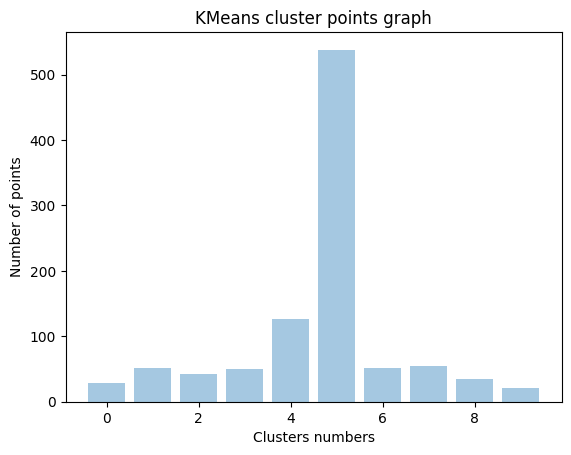

In [55]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points graph')
plt.xlabel("Clusters numbers")
plt.ylabel("Number of points")
plt.show()


In [56]:
for i in range(10):
    print("Four reviews for the assigned to the cluster: ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print("_" * 70)

Four reviews for the assigned to the cluster:  0
----------------------------------------------------------------------
Phone good just a little slow phone old but it's a great phone temporary right now. thank you for the great deal


Met all of my expectations. I can't complain at all. Great price!


Works great.


______________________________________________________________________
Four reviews for the assigned to the cluster:  1
----------------------------------------------------------------------
excellent product in perfect condition


Excellent phone has all the special functions to be communicated with all social networks, excellent operational...I recommend it 100% excellent product


Excelent


______________________________________________________________________
Four reviews for the assigned to the cluster:  2
----------------------------------------------------------------------
Had this phone before and loved it but was not working so I got this phone. One thing is the 

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming cluster_data_df and its 'Reviews' column are already defined

# Initialize the CountVectorizer
count_vect = CountVectorizer()

# Fit and transform the 'Reviews' column to compute BoW features
bow = count_vect.fit_transform(cluster_data_df['Reviews'].values)

# Print the shape of the BoW matrix
print(bow.shape)


(1000, 3455)


In [58]:
from sklearn.cluster import KMeans

# Assuming bow and model are already defined

# Initialize the KMeans model with 10 clusters, 'k-means++' initialization, and a random state
model = KMeans(n_clusters=10, init='k-means++', random_state=99)

# Fit the KMeans model to the BoW matrix
model.fit(bow)


KMeans(n_clusters=10, random_state=99)

In [59]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [60]:
from sklearn import metrics
print(metrics.silhouette_score(bow, labels, metric='euclidean'))

0.39528026327024723


In [61]:
cluster_data_df['Bow Clus Label'] = model.labels_ # in the last column you can also see the label numebers
cluster_data_df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lowercasing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,feel LUCKY found used phone us used hard phone...,feel lucky found used phone us used hard phone...,"[feel, lucky, found, used, phone, us, used, ha...",feel lucki found use phone us use hard phone l...,feel lucki found use phone u use hard phone li...,4,9
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue clean set ...,nice phone nice grade pantach revue clean set ...,"[nice, phone, nice, grade, pantach, revue, cle...",nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,5,0


In [62]:
from sklearn.cluster import DBSCAN
import numpy as np

In [63]:
import numpy as np

# Setting the minimum number of points for density-based clustering
minPts = 200

# Computes the distance to the 200th nearest neighbor for a given data point x
def compute_200th_nearest_neighbour(x, data):
    # Compute Euclidean distances between x and all points in data
    dists = np.sum((data - x) ** 2, axis=1)
    # Sort distances in ascending order
    dists_sorted = np.sort(dists)
    # Return the distance to the 200th nearest neighbor
    return dists_sorted[minPts - 1]

# Example usage:
# x = data[0]  # Example data point
# distance_200th_nearest_neighbor = compute_200th_nearest_neighbour(x, data)


In [65]:
list_of_sent_train = list()
for i in cluster_data_df["Lowercasing"].values:
    list_of_sent_train.append(i.split())

In [66]:
import gensim

w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

In [70]:
import numpy as np


sent_vectors = []


count = 1


for sent in list_of_sent_train:

    sent_vec = np.zeros(100)


    cnt_words = 1


    for word in sent:
        try:

            vec = w2v_model.wv[word]


            sent_vec += vec


            cnt_words += 1
        except:

            pass


    sent_vec /= cnt_words


    sent_vectors.append(sent_vec)


sent_vectors = np.array(sent_vectors)


sent_vectors = np.nan_to_num(sent_vectors)

In [73]:
# Initialize an empty list to store the 200th nearest neighbor distances
twohundrethneigh = []

# Iterate through each vector in the slice sent_vectors[:300]
for val in sent_vectors[:300]:
    # Compute the 200th nearest neighbor distance for the current vector
    distance = compute_200th_nearest_neighbour(val, sent_vectors[:300])

    # Append the distance to the list
    twohundrethneigh.append(distance)

# Sort the list of distances
twohundrethneigh.sort()


In [74]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [75]:
cluster_data_df['AVG-W2V Clus Label'] = model.labels_
cluster_data_df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lowercasing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,feel LUCKY found used phone us used hard phone...,feel lucky found used phone us used hard phone...,"[feel, lucky, found, used, phone, us, used, ha...",feel lucki found use phone us use hard phone l...,feel lucki found use phone u use hard phone li...,4,9,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue clean set ...,nice phone nice grade pantach revue clean set ...,"[nice, phone, nice, grade, pantach, revue, cle...",nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,5,0,0


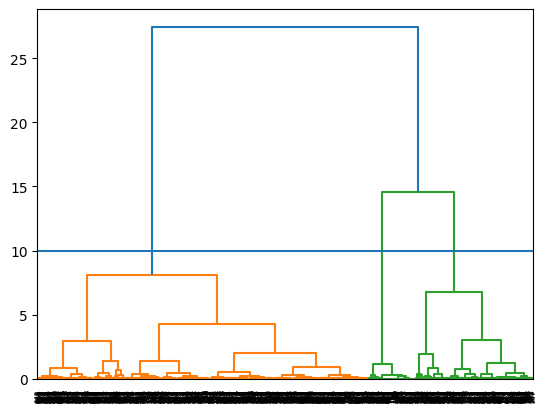

In [76]:
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10) # cut at 30 to get 5 clusters

In [77]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(sent_vectors)

In [78]:

aggdfa = cluster_data_df
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lowercasing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,feel LUCKY found used phone us used hard phone...,feel lucky found used phone us used hard phone...,"[feel, lucky, found, used, phone, us, used, ha...",feel lucki found use phone us use hard phone l...,feel lucki found use phone u use hard phone li...,4,9,3
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue clean set ...,nice phone nice grade pantach revue clean set ...,"[nice, phone, nice, grade, pantach, revue, cle...",nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,5,0,0


In [79]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    486
1    168
2     95
3    182
4     69
Name: Reviews, dtype: int64

In [81]:
for i in range(5):
    print("Two reviews are of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

Two reviews are of assigned to cluster  0
----------------------------------------------------------------------
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


______________________________________________________________________
Two reviews are of assigned to cluster  1
----------------------------------------------------------------------
as described, fast ship!


Met all of my expectations. I can't complain at all. Great price!


______________________________________________________________________
Two reviews are of assigned to cluster  2
-------------------------------------------------------------

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

In [ ]:
#K-means is used to split a large dataset into a predetermined number of clustes, which are subsequently generalized into different sizes and shapes. It works well with large datasets, but less well with noisy data.
#DBscan is used to identify high-density and low-density clusters. It performs poorly on large datasets but well on noisy data.

#A method called hierarchical clustering can be used to put together groups of things that are similar. These groups are called clusters. Sorting the clusters using Hierarchical C is challenging.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:I found this project to be a little challenging.I finished this task by consulting a lot of references.Natural language processing (NLP) pipelines and machine learning models require proficiency in text pre-processing, feature extraction, and clustering, all of which were addressed in this assignment. Techniques including TF-IDF vectorization, punctuation removal, and noise reduction were addressed. Additionally, density-based clustering and KMeans clustering techniques were shown. Text input was converted into numerical vectors for machine learning algorithms using methods like Bag-of-Words representation and TF-IDF vectorization. The focus was on robustness and efficiency, with refactoring to increase efficiency and managing edge cases and exceptions. Additionally, comments and explanations were included to make it easier to read.





'''